In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv('dataset_phishing.csv')
df.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [62]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

#### Create New Features

In [64]:
# 1. Count special characters
df['num_special_chars'] = df['url'].str.count(r'[^a-zA-Z0-9]')

# 2. Check if URL uses HTTPS
df['has_https'] = df['url'].str.contains('https://').astype(int)

# 3. URL depth (how many slashes)
df['url_depth'] = df['url'].str.count('/')

In [66]:
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,num_special_chars,has_https,url_depth
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,45,-1,0,1,1,4,legitimate,7,0,3
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,77,5767,0,0,1,2,phishing,7,0,5
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,14,4004,5828815,0,1,0,phishing,19,1,5
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,62,-1,107721,0,0,3,legitimate,5,0,2
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,224,8175,8725,0,0,6,legitimate,10,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,448,5396,3980,0,0,6,legitimate,7,0,4
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,211,6728,0,0,1,0,phishing,15,0,5
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,2809,8515,8,0,1,10,legitimate,17,1,5
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,85,2836,2455493,0,0,4,legitimate,6,0,3


In [68]:
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder

# Example: Hash or encode domain
df['domain'] = df['url'].apply(lambda x: urlparse(x).netloc)
le = LabelEncoder()
df['domain_encoded'] = le.fit_transform(df['domain'])

# Drop original URL to avoid leakage
df.drop(['url', 'domain'], axis=1, inplace=True)

In [70]:
df['status']=le.fit_transform(df['status'])
df

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_age,web_traffic,dns_record,google_index,page_rank,status,num_special_chars,has_https,url_depth,domain_encoded
0,37,19,0,3,0,0,0,0,0,0,...,-1,0,1,1,4,0,7,0,3,5135
1,77,23,1,1,0,0,0,0,0,0,...,5767,0,0,1,2,1,7,0,5,3442
2,126,50,1,4,1,0,1,2,0,3,...,4004,5828815,0,1,0,1,19,1,5,3701
3,18,11,0,2,0,0,0,0,0,0,...,-1,107721,0,0,3,0,5,0,2,3225
4,55,15,0,2,2,0,0,0,0,0,...,8175,8725,0,0,6,0,10,0,5,6065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,5396,3980,0,0,6,0,7,0,4,5582
11426,84,18,0,5,0,1,1,0,0,1,...,6728,0,0,1,0,1,15,0,5,4832
11427,105,16,1,2,6,0,1,0,0,1,...,8515,8,0,1,10,0,17,1,5,5508
11428,38,30,0,2,0,0,0,0,0,0,...,2836,2455493,0,0,4,0,6,0,3,6665


#### Scaling

In [72]:
median_age = df[df['domain_age'] != -1]['domain_age'].median()
df['domain_age'] = df['domain_age'].replace(-1, median_age)

from sklearn.preprocessing import MinMaxScaler
num_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
scaler=MinMaxScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])
df

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_age,web_traffic,dns_record,google_index,page_rank,status,num_special_chars,has_https,url_depth,domain_encoded
0,0.015347,0.071429,0.0,0.086957,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.393295,0.000000e+00,1.0,1.0,0.4,0,0.011152,0,0.032258,5135
1,0.039902,0.090476,1.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.448471,0.000000e+00,0.0,1.0,0.2,1,0.011152,0,0.096774,3442
2,0.069982,0.219048,1.0,0.130435,0.023256,0.00,0.333333,0.105263,0.0,0.157895,...,0.311656,5.413097e-01,0.0,1.0,0.0,1,0.055762,1,0.096774,3701
3,0.003683,0.033333,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.393295,1.000382e-02,0.0,0.0,0.3,0,0.003717,0,0.000000,3225
4,0.026397,0.052381,0.0,0.043478,0.046512,0.00,0.000000,0.000000,0.0,0.000000,...,0.635341,8.102722e-04,0.0,0.0,0.6,0,0.022305,0,0.096774,6065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0.020258,0.061905,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.419680,3.696142e-04,0.0,0.0,0.6,0,0.011152,0,0.064516,5582
11426,0.044199,0.066667,0.0,0.173913,0.000000,0.25,0.333333,0.000000,0.0,0.052632,...,0.523048,0.000000e+00,0.0,1.0,0.0,1,0.040892,0,0.096774,4832
11427,0.057090,0.057143,1.0,0.043478,0.139535,0.00,0.333333,0.000000,0.0,0.052632,...,0.661726,7.429430e-07,0.0,1.0,1.0,0,0.048327,1,0.096774,5508
11428,0.015961,0.123810,0.0,0.043478,0.000000,0.00,0.000000,0.000000,0.0,0.000000,...,0.221015,2.280364e-01,0.0,0.0,0.4,0,0.007435,0,0.032258,6665


#### Correlation Analysis:

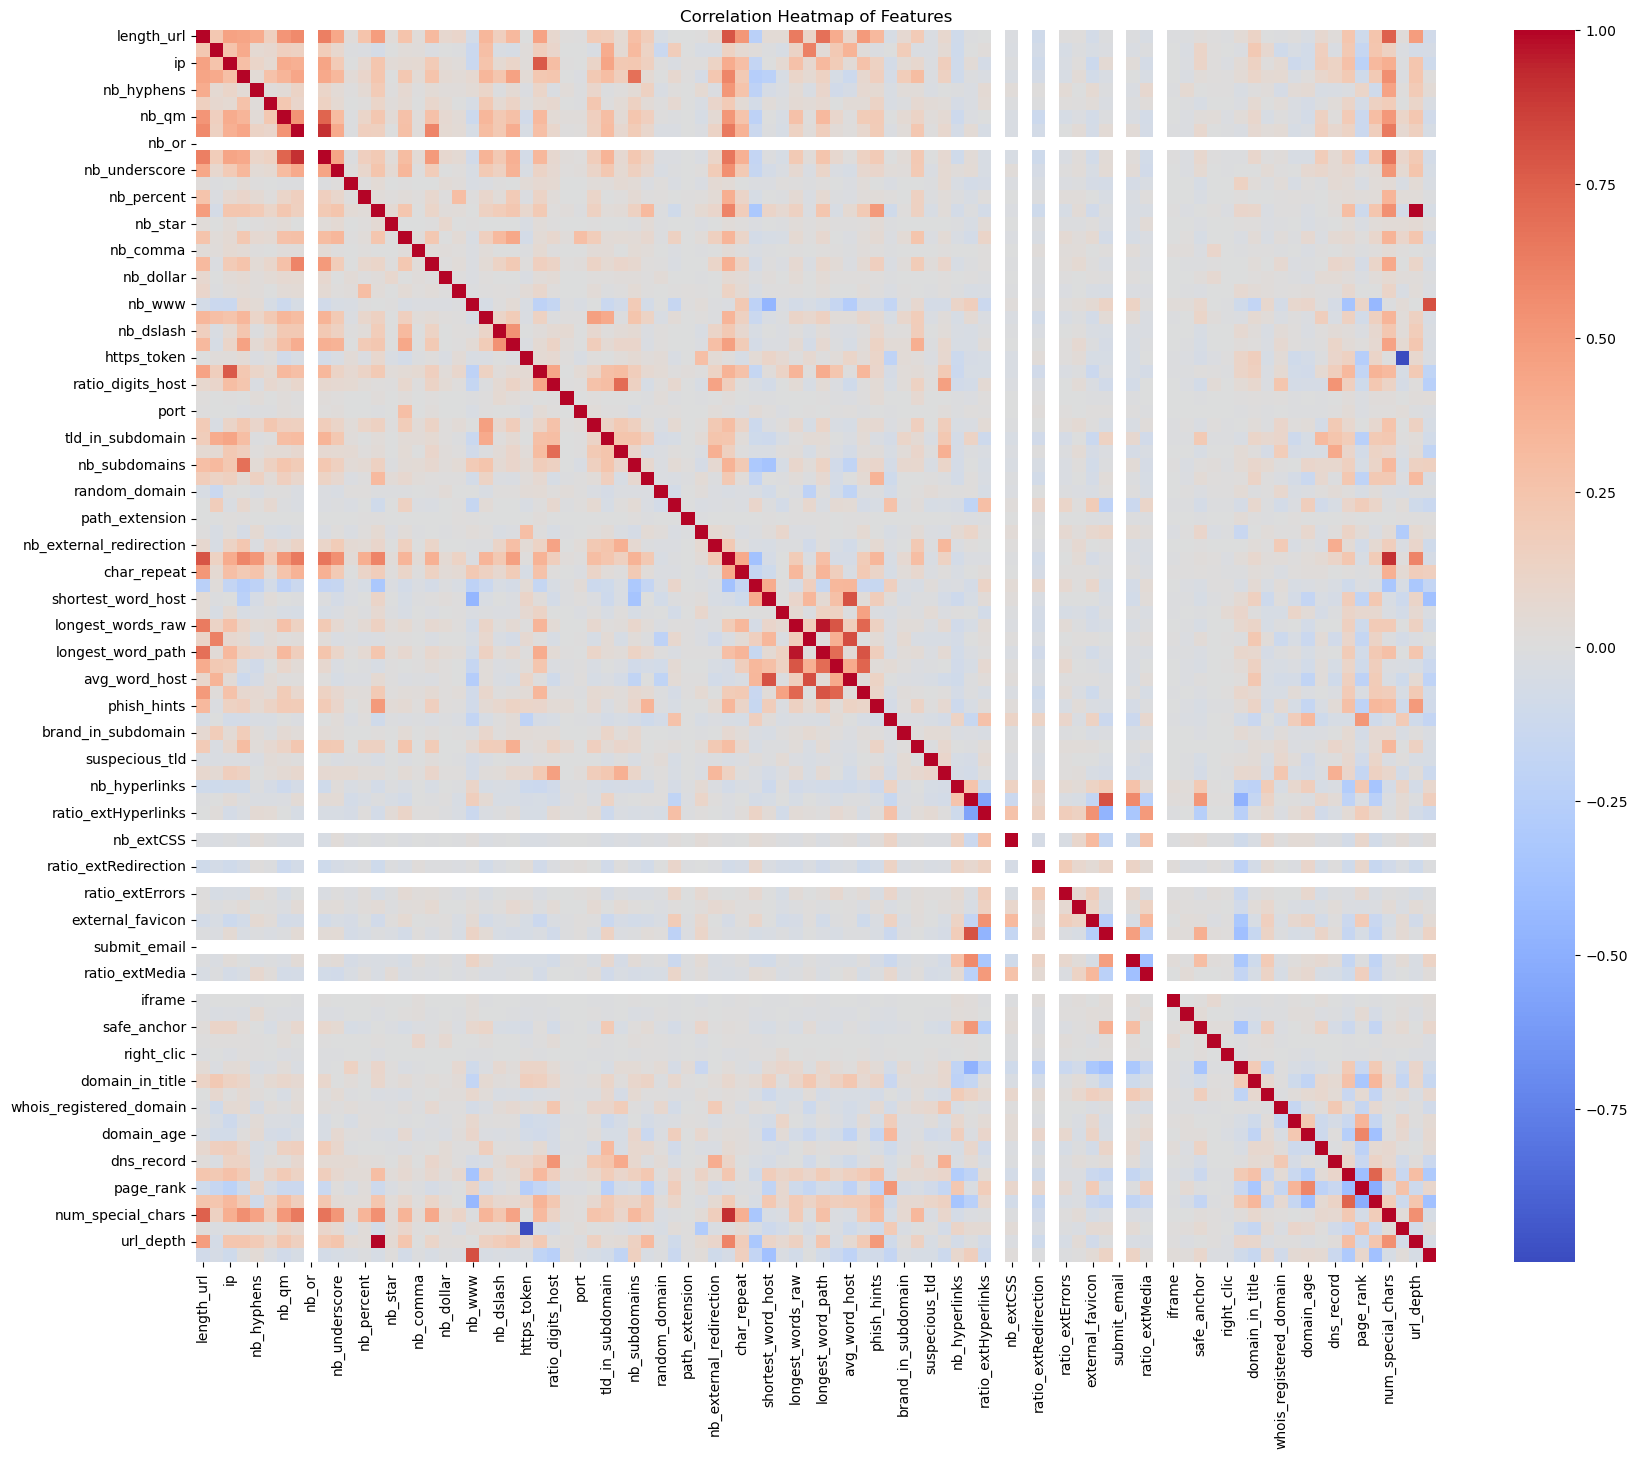

Highly correlated feature pairs (|corr| > 0.9):
url_depth ↔ nb_slash = 1.00
has_https ↔ https_token = -1.00
longest_word_path ↔ longest_words_raw = 0.97
num_special_chars ↔ length_words_raw = 0.91
nb_eq ↔ nb_and = 0.91


In [74]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap for all features
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

# Find highly correlated pairs (absolute correlation > 0.9)
threshold = 0.9
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display top 10 most correlated feature pairs
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)
print("Highly correlated feature pairs (|corr| > 0.9):")
for feat1, feat2, corr_val in high_corr_pairs[:10]:
    print(f"{feat1} ↔ {feat2} = {corr_val:.2f}")

#### Drop Unnecessary Columns

In [ ]:
df.drop(['longest_words_raw','nb_and','nb_slash','https_token','length_words_raw'],axis=1,inplace=True)
df

#### Correlation Analysis After Removing Unnecessary Columns

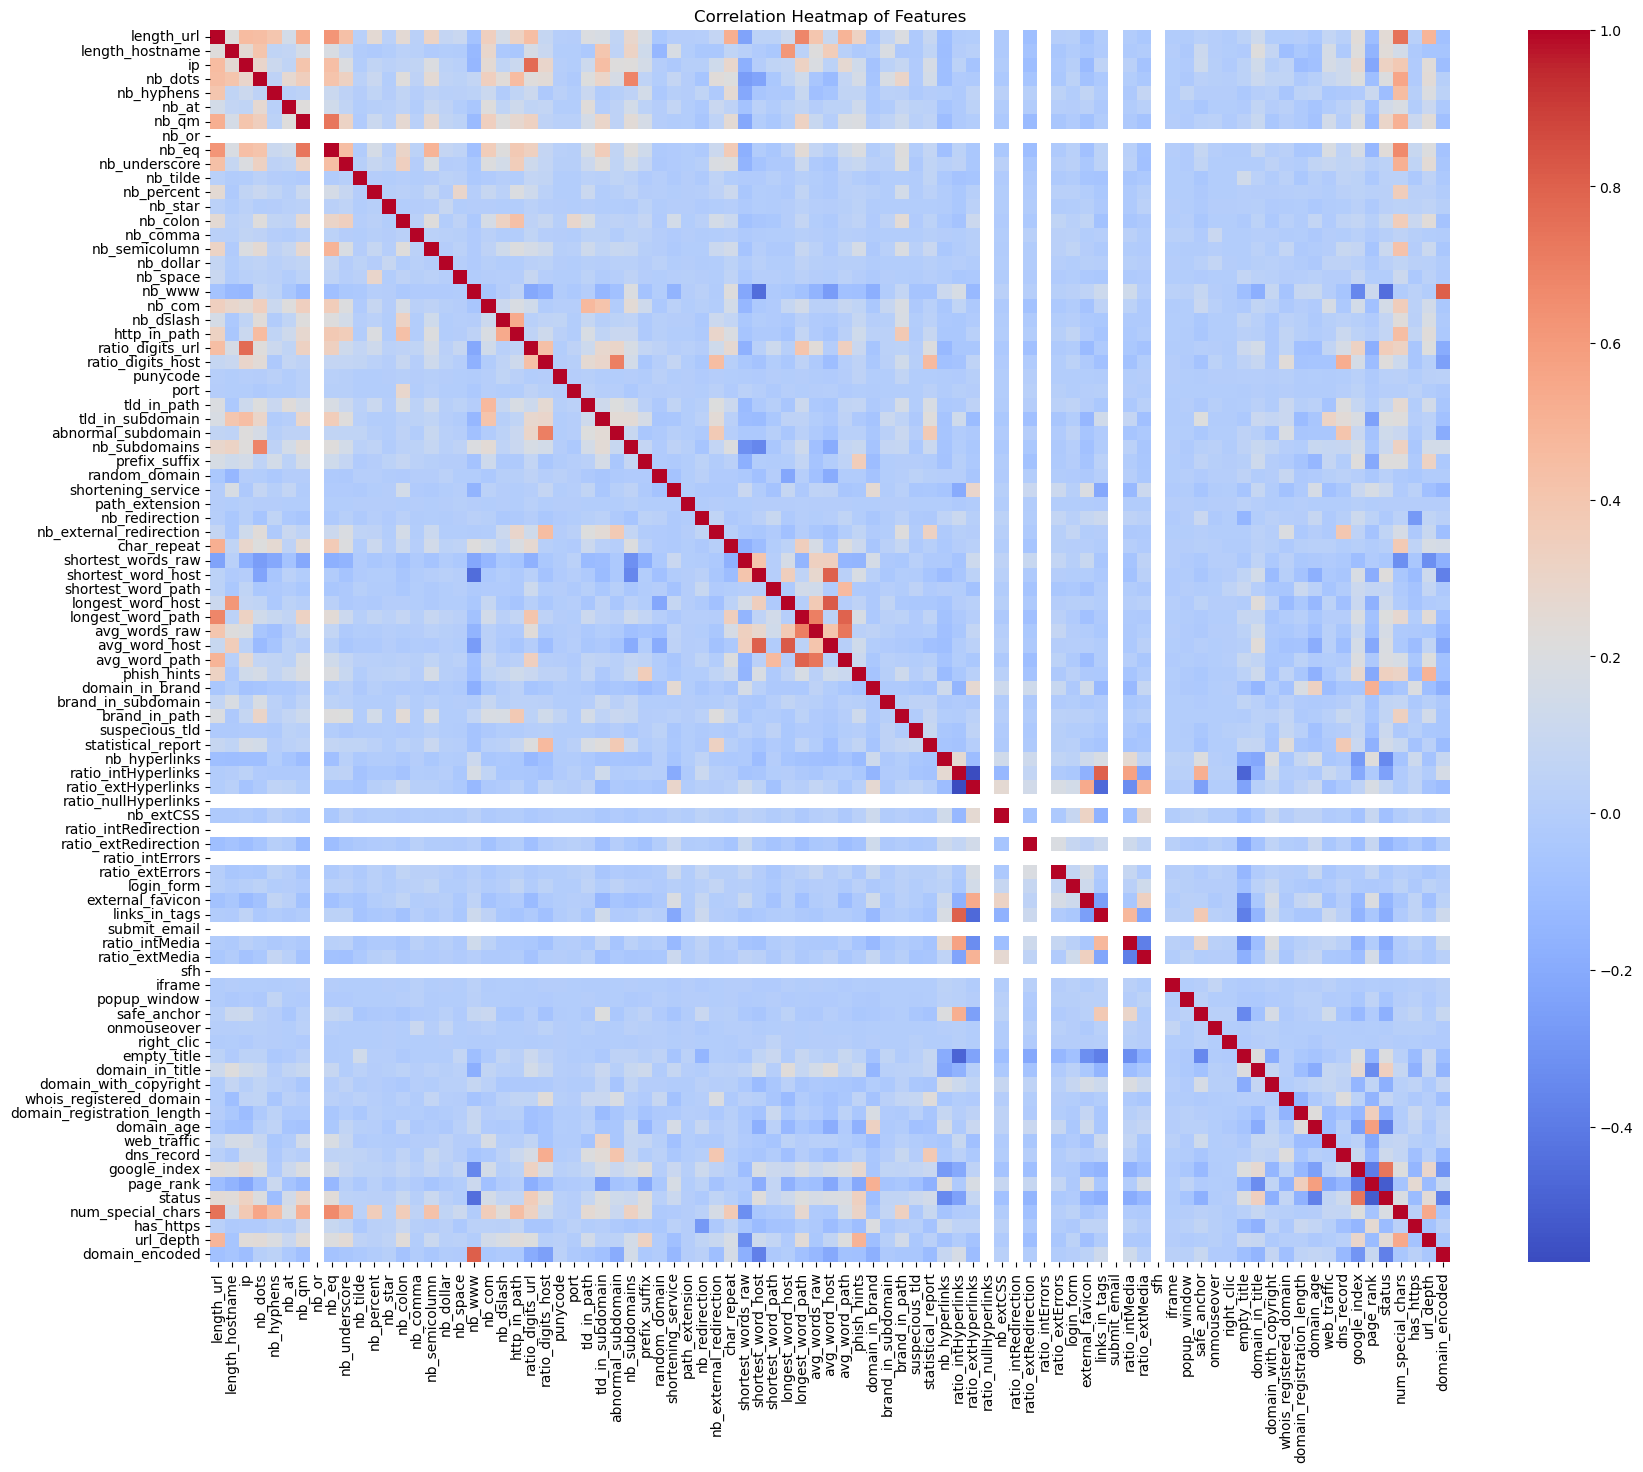

Highly correlated feature pairs (|corr| > 0.9):


In [80]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap for all features
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

# Find highly correlated pairs (absolute correlation > 0.9)
threshold = 0.9
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Display top 10 most correlated feature pairs
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)
print("Highly correlated feature pairs (|corr| > 0.9):")
for feat1, feat2, corr_val in high_corr_pairs[:10]:
    print(f"{feat1} ↔ {feat2} = {corr_val:.2f}")

#### Splitting

In [87]:
from sklearn.model_selection import train_test_split
X=df.drop('status',axis=1)
y=df['status']

In [89]:
from sklearn.ensemble import RandomForestClassifier
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances.head(15)

google_index            0.145419
page_rank               0.109137
nb_hyperlinks           0.077141
web_traffic             0.071164
domain_encoded          0.054528
nb_www                  0.040460
domain_age              0.036599
ratio_extHyperlinks     0.029932
longest_word_path       0.029799
safe_anchor             0.028912
phish_hints             0.021375
ratio_intHyperlinks     0.020749
ratio_digits_url        0.017817
ratio_extRedirection    0.017548
length_url              0.016913
dtype: float64

In [91]:
importances.tail(15)

brand_in_subdomain         0.000072
nb_comma                   0.000059
right_clic                 0.000044
path_extension             0.000035
onmouseover                0.000020
nb_external_redirection    0.000003
nb_or                      0.000000
nb_star                    0.000000
nb_dollar                  0.000000
sfh                        0.000000
ratio_nullHyperlinks       0.000000
punycode                   0.000000
submit_email               0.000000
ratio_intRedirection       0.000000
ratio_intErrors            0.000000
dtype: float64

#### Drop bottom 15 least important features

In [93]:
# Drop bottom 15 least important features
features_to_keep = importances[:-15].index  # Keep all except bottom 15
X_train_reduced = X_train[features_to_keep]
X_test_reduced = X_test[features_to_keep]

# Now retrain using the reduced feature set
model_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
model_reduced.fit(X_train_reduced, y_train)

RandomForestClassifier(random_state=42)

#### Accuracy

In [95]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model_reduced.predict(X_test_reduced)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)


Accuracy: 0.9676290463692039
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1157
           1       0.97      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



In [104]:
y.name

'status'